In [ ]:
# reading data

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving RCA_V3.csv to RCA_V3.csv


In [ ]:
# drop unnecessary columns and rename cols

data = (pd.read_csv('RCA_V3.csv',sep=None,engine='python', usecols = ['RCA_Main_Root_Cause','RCA Defect Domain'])).dropna(how='all')
print(data)

data.columns = ['text', 'label']

data.head()

                                     RCA_Main_Root_Cause RCA Defect Domain
0      Parking position handling was not well address...            Design
1                       The SDS of WH was not up-to-date            Design
2                 Direct use of a trace definition file.       Integration
3                 Patch too old, not traceable any more.       Integration
4      Clearmake does not remove already build obsole...       Integration
...                                                  ...               ...
10735                                         SW design.            Design
10736                                         SW design.            Design
10737  A DDF timeout is not reported by the CN facili...       Realization
10738  Automated regression does not capture the impa...            Design
10739  The combination of file sizes, number of scann...             Other

[10521 rows x 2 columns]


,text,label
0,Parking position handling was not well address...,Design
1,The SDS of WH was not up-to-date,Design
2,Direct use of a trace definition file.,Integration
3,"Patch too old, not traceable any more.",Integration
4,Clearmake does not remove already build obsole...,Integration


In [ ]:
# check missing values
data.isna().sum()

text     316
label    264
dtype: int64

In [ ]:
# check data shape
data.shape

(10521, 2)

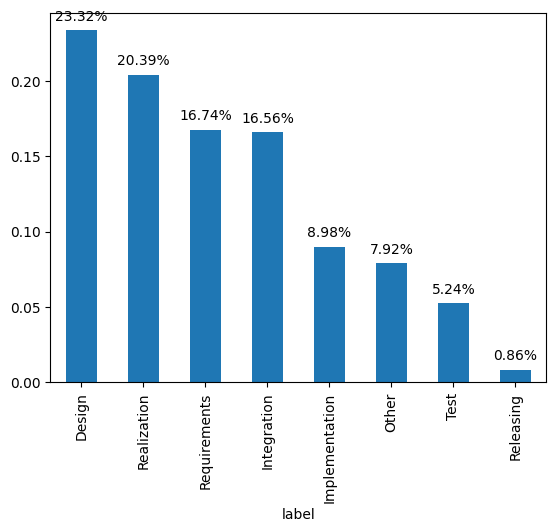

In [ ]:
# check target balance

import matplotlib.pyplot as plt

value_counts = data['label'].value_counts(normalize=True)

ax = value_counts.plot.bar()

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('popular')
nltk.download('all')

# Assuming 'text' column may have NaN values, fill NaN with an empty string
data['text'] = data['text'].fillna('')

text = list(data['text'])
lemmatizer = WordNetLemmatizer()

data.head()


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

,text,label
0,Parking position handling was not well address...,Design
1,The SDS of WH was not up-to-date,Design
2,Direct use of a trace definition file.,Integration
3,"Patch too old, not traceable any more.",Integration
4,Clearmake does not remove already build obsole...,Integration


In [ ]:
# Create Feature and Label sets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df = pd.DataFrame(data)
df = df.dropna(subset=['label'])

data.reset_index(drop=True, inplace=True)
# Encode labels to integers
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

X = df['text']
Y = df['label_encoded']

# Train-test split (67% train - 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=123)


print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)


Training Data : (6872,)
Testing Data :  (3385,)


In [ ]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()


X_train_cv = cv.fit_transform(X_train.values.astype('str'))

X_train_cv.shape

print(X_train_cv)

  (0, 6078)	2
  (0, 6047)	1
  (0, 1772)	1
  (0, 1063)	1
  (0, 3816)	1
  (0, 5813)	1
  (0, 2963)	1
  (0, 5619)	1
  (0, 5153)	1
  (0, 6132)	2
  (0, 4357)	1
  (0, 2801)	1
  (0, 1418)	1
  (0, 2758)	2
  (0, 794)	2
  (0, 4620)	1
  (0, 2897)	1
  (0, 6828)	1
  (0, 1066)	1
  (1, 6078)	1
  (1, 6047)	1
  (1, 4357)	1
  (1, 6560)	1
  (1, 4100)	1
  (1, 2384)	1
  :	:
  (6871, 4100)	1
  (6871, 6201)	1
  (6871, 6110)	3
  (6871, 3197)	2
  (6871, 530)	1
  (6871, 4650)	1
  (6871, 3156)	1
  (6871, 5948)	1
  (6871, 3585)	1
  (6871, 1006)	1
  (6871, 6760)	1
  (6871, 2726)	1
  (6871, 456)	1
  (6871, 3825)	2
  (6871, 1233)	1
  (6871, 3569)	1
  (6871, 2991)	2
  (6871, 6150)	1
  (6871, 3979)	1
  (6871, 2192)	1
  (6871, 3382)	1
  (6871, 2825)	1
  (6871, 3410)	1
  (6871, 2899)	1
  (6871, 784)	1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000, multi_class='ovr')

lr.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)

predictions = lr.predict(X_test_cv)

# Reverse the encoding to get original class labels
predicted_labels = label_encoder.inverse_transform(predictions)
true_labels = label_encoder.inverse_transform(y_test)
# print(true_labels)
# Print classification report
print(classification_report(true_labels, predicted_labels))


                precision    recall  f1-score   support

        Design       0.67      0.75      0.71       770
Implementation       0.55      0.29      0.38       313
   Integration       0.48      0.63      0.55       575
         Other       0.68      0.43      0.53       268
   Realization       0.58      0.68      0.63       698
     Releasing       1.00      0.50      0.67        28
  Requirements       0.67      0.61      0.64       560
          Test       0.56      0.33      0.41       173

      accuracy                           0.60      3385
     macro avg       0.65      0.53      0.56      3385
  weighted avg       0.61      0.60      0.59      3385



In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.utils import to_categorical

# Sample dataset
texts = [
    "The equipment malfunctioned during the production process.",
    "An error in the operating procedure led to the breakdown of machinery.",
    "Human error caused the inefficiency in the production line.",
    "The software glitch resulted in delays in the manufacturing process."
]
labels = ['Equipment Failure', 'Equipment Failure', 'Human Error', 'Process Defect']

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)
print(tokenizer.word_index)
print(sequences)
#print(tokenizer)

# Convert labels to one-hot encoding
label_dict = {label: i for i, label in enumerate(set(labels))}
labels_encoded = [label_dict[label] for label in labels]
one_hot_labels = to_categorical(labels_encoded)
print(one_hot_labels)

# Define CNN model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
num_classes = len(set(labels))

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, one_hot_labels, epochs=10, batch_size=2)

# Test the model with a new text
new_text = "A malfunction in the equipment caused a halt in production."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=max_len)
prediction = model.predict(new_padded_sequence)
predicted_label = np.argmax(prediction)
predicted_label_name = list(label_dict.keys())[list(label_dict.values()).index(predicted_label)]
print("Predicted root cause category:", predicted_label_name)


{'the': 1, 'in': 2, 'production': 3, 'process': 4, 'error': 5, 'equipment': 6, 'malfunctioned': 7, 'during': 8, 'an': 9, 'operating': 10, 'procedure': 11, 'led': 12, 'to': 13, 'breakdown': 14, 'of': 15, 'machinery': 16, 'human': 17, 'caused': 18, 'inefficiency': 19, 'line': 20, 'software': 21, 'glitch': 22, 'resulted': 23, 'delays': 24, 'manufacturing': 25}
[[1, 6, 7, 8, 1, 3, 4], [9, 5, 2, 1, 10, 11, 12, 13, 1, 14, 15, 16], [17, 5, 18, 1, 19, 2, 1, 3, 20], [1, 21, 22, 23, 2, 24, 2, 1, 25, 4]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Epoch 1/10
2/2 [==============================] - 1s 19ms/step - loss: 1.0862 - accuracy: 0.2500
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 0.9708 - accuracy: 0.7500
Epoch 3/10
2/2 [==============================] - 0s 13ms/step - loss: 0.8843 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 0.8095 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 11ms/step -

In [ ]:
# confusion matrix

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['Design','Implementation','Integration','Other','Realization','Releasing','Requirements','Test'], columns=['Design','Implementation','Integration','Other','Realization','Releasing','Requirements','Test'])



In [ ]:
distrib_samples = x_train[:100]
session = keras.backend.tensorflow_backend.get_session()
# session had to be manually specified
# otherwise looked for Keras.._SESSION ct. which doesn't exist!
explainer = shap.DeepExplainer(model, distrib_samples, session)
num_explanations = 10

NameError: name 'x_train' is not defined

In [ ]:
!pip install shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.6 MB/s eta 0:00:00


Length of feature_names: 100
Length of shap_values: 750
Length of exp: 750
Shape of sv: (750, 100, 10)


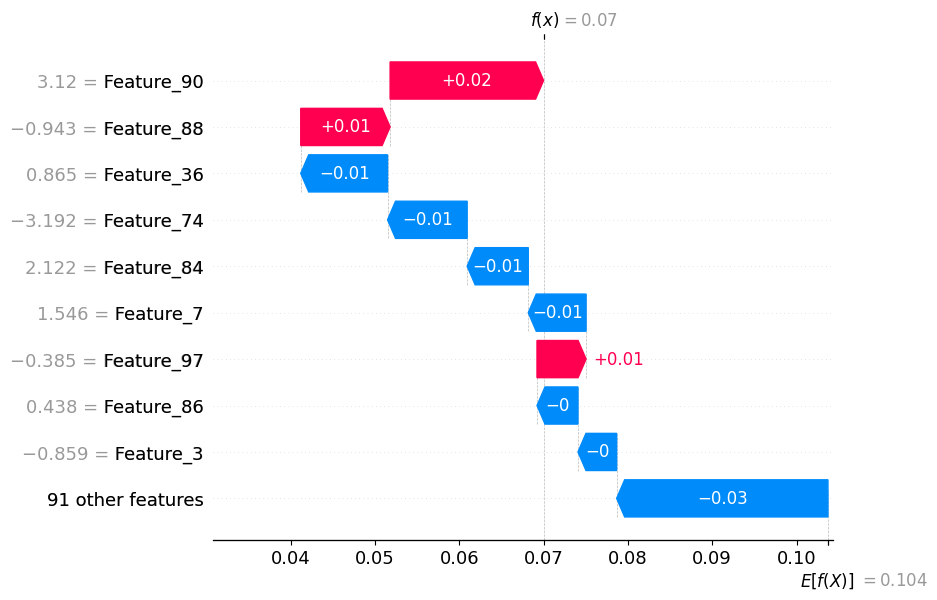

In [ ]:
# import xgboost
# import shap

# # train an XGBoost model

# model = xgboost.XGBRegressor().fit(X_train_cv, y_train)

# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
# explainer = shap.Explainer(model)
# shap_values = explainer(X_train_cv)

# # visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])



# /////// TEST/////
from sklearn.datasets import make_classification
from shap import Explainer, Explanation, waterfall_plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(1000, 100, n_informative=9, n_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = Explainer(model)
sv = explainer(X_train)
feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]  # Adjust the format of feature names if needed

exp = Explanation(sv[:,:,6], sv.base_values[:,6], X_train, feature_names=feature_names)
idx = 7 # datapoint to explain
#print(data)

print("Length of feature_names:", len(feature_names))
print("Length of shap_values:", len(sv))
print("Length of exp:", len(exp))
print("Shape of sv:", sv.shape)

# Ensure idx is within bounds
if idx < len(exp):
    waterfall_plot(exp[idx])
else:
    print("Index out of range.")



In [ ]:
import shap
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define your classes
classes = ['Design', 'Implementation', 'Integration', 'Other', 'Realization', 'Releasing', 'Requirements', 'Test']
num_classes = len(classes)

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=9, n_classes=num_classes)
# Map numeric classes to your defined class names
y = [classes[i % num_classes] for i in y]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Select a specific data point to explain
idx = 7

# Ensure idx is within bounds and plot
if idx < len(shap_values):
    print(f"Explaining the prediction for data point at index {idx}")
    shap.waterfall_plot(shap_values[0])
else:
    print("Index out of range.")


 99%|===================| 1972/2000 [00:52<00:00]       

Explaining the prediction for data point at index 7


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (100, 8)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

import shap
# print(shap.__version__)

# X, y = load_breast_cancer(return_X_y=True, as_frame=True)
# print(X_train[:,1])
# print(sv.base_values[:,1])
# print(X.columns)
# print(df.columns)
# print(X.values)
# print(y_train)
model = RandomForestClassifier(max_depth=5, n_estimators=100).fit(X_train_cv, y_train)
explainer = TreeExplainer(model)
sv = explainer(X_train_cv)
# print(sv.base_values)
exp = Explanation(sv.values[:,:,7],
                  X_train[:,7],
                  # data=X.values,
                  feature_names=df.columns)
idx = 0
waterfall(exp[idx])

ValueError: Found input variables with inconsistent numbers of samples: [6872, 750]

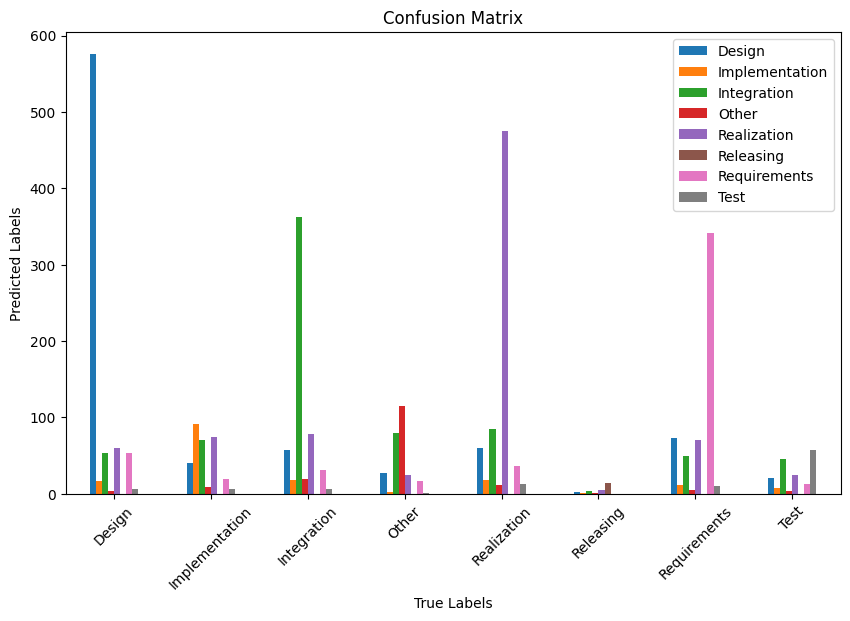

In [ ]:
# import xgboost
# import shap
# # print(data)
# # train an XGBoost model
# # X, y = shap.datasets.california()

# # print(df.columns.array)
# model = xgboost.XGBRegressor().fit(X_train_cv, y_train)

# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)

# explainer = shap.Explainer(model)
# shap_values = explainer(X_train_cv)

# # visualize the first prediction's explanation
# shap.plots.bar(shap_values)
import matplotlib.pyplot as plt


# Assuming df is your confusion matrix DataFrame
df.plot(kind='bar', figsize=(10, 6))

plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.xticks(rotation=45)
plt.show()

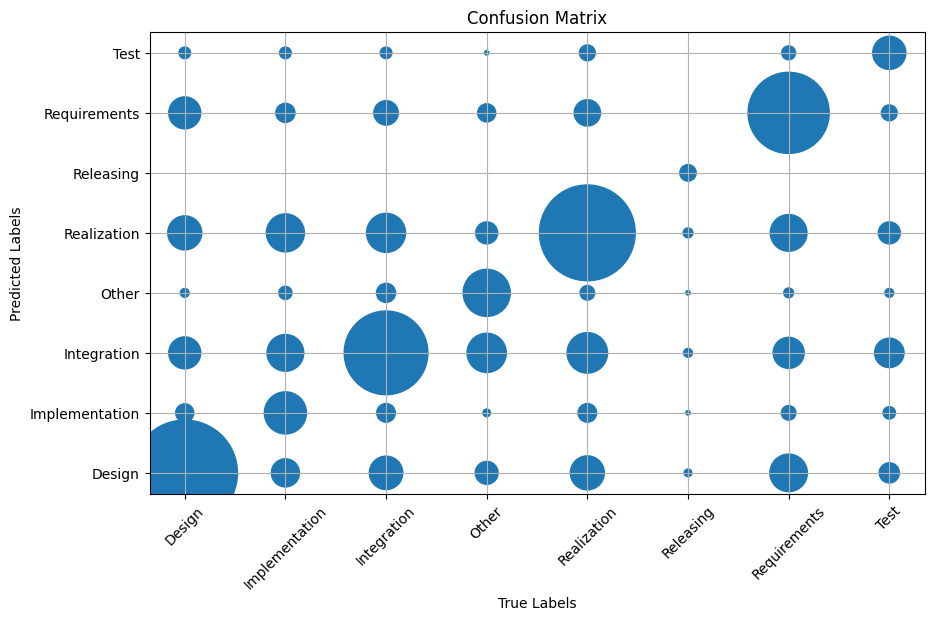

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your confusion matrix DataFrame
true_labels = df.index.values
predicted_labels = df.columns.values
counts = df.values.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(true_labels.repeat(len(predicted_labels)), predicted_labels.tolist() * len(true_labels), s=counts*10)
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample confusion matrix data
data = {
    'Design': [20, 5, 2, 0],
    'Implementation': [3, 15, 2, 1],
    'Integration': [0, 1, 18, 3],
    'Other': [0, 2, 5, 20]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Aggregate counts for each true label
agg_df = df.groupby(df.index).sum()

# Melt the DataFrame to reshape it for plotly
melted_df = pd.melt(agg_df.reset_index(), id_vars='index', var_name='Predicted Label', value_name='Count')

labels = melted_df['index'].tolist()
changes = melted_df['Count'].tolist()

# Plot the waterfall chart
fig = go.Figure(go.Waterfall(
    orientation="v",
    measure=["total"] * len(changes),
    x=labels,
    textposition="outside",
    text=labels,
    y=changes,
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))

fig.update_layout(
    title="Confusion Matrix Waterfall",
    showlegend=False
)

fig.show()


In [ ]:
shap_exp = shap.Explanation(shap_values, base_values=explainer.expected_value, data=X_test_cv)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0], df.values[0], max_display=20)

Exception: The waterfall_plot can currently only plot a single explanation but a matrix of explanations was passed!

In [ ]:
import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model)
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



  0%|          | 0/240 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:52, 52.77s/it]               
